In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
def generator():
  model = Sequential()
  model.add(Dense(16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 100))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dense(2, activation = 'linear'))
  return model

def discriminator():
  model = Sequential()
  model.add(Dense(32, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 2))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dense(8, activation = 'relu', kernel_initializer = 'random_uniform'))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dense(1, activation = 'sigmoid'))
  return model

In [3]:
def print_generated_samples(batch_size):
  X_test = np.linspace(-1, 1, 1000)
  X_test = X_test.reshape(-1, 1)

  noise = np.random.normal(0, 1, (batch_size//2, 100))
  gen_data = gen.predict(noise)
  plt.scatter(X_test, X_test, color = 'green')
  plt.scatter(gen_data[:,0], gen_data[:,1], color =  'red')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.legend(["actual data", "generated data"], loc = "lower right")
  plt.show()

In [4]:
X_train = np.linspace(-1, 1, 1000)
X_train = X_train.reshape(-1, 1)
y_train = X_train

In [5]:


def train_gan(gen, disc, gan, noise_dim, epochs = 10000, batch_size = 128):

  for e in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, noise_dim))

    fake_samples = gen.predict(noise)
    fake_labels = np.zeros((batch_size, 1))

    real_data = np.hstack((X_train, y_train))
    real_data = real_data[np.random.randint(0, real_data.shape[0], size = batch_size)]
    real_labels = np.ones((batch_size, 1))*0.9


    disc_real_loss = disc.train_on_batch(real_data,real_labels)
    disc_fake_loss = disc.train_on_batch(fake_samples, fake_labels)
    tot_disc_loss = np.add(disc_real_loss, disc_fake_loss) / 2

    x_gan = np.random.normal(0, 1, (batch_size, noise_dim))
    y_gan = np.ones((batch_size, 1))
    gan_loss = gan.train_on_batch(x_gan, y_gan)

    if e % 1000 == 0 or e == epochs-1:
      print('Epoch: ', e, ' Generator Loss: ', gan_loss , ' Discriminator Loss: ', tot_disc_loss)
      print_generated_samples(batch_size)

4/4 [==============================] - 0s 5ms/step
Epoch:  0  Generator Loss:  [0.6911404132843018, 1.0]  Discriminator Loss:  [0.6937364 0.       ]
2/2 [==============================] - 0s 8ms/step


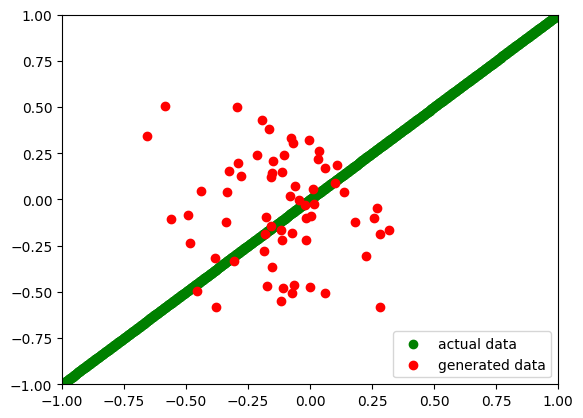

4/4 [==============================] - 0s 4ms/step
Epoch:  1000  Generator Loss:  [0.7567617893218994, 0.0]  Discriminator Loss:  [0.68800279 0.5       ]
2/2 [==============================] - 0s 6ms/step


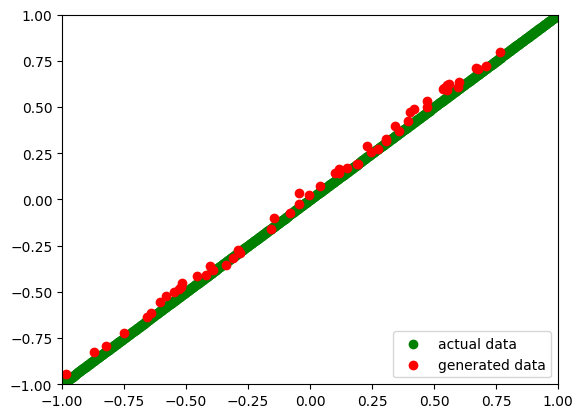

4/4 [==============================] - 0s 3ms/step
Epoch:  2000  Generator Loss:  [0.7784796953201294, 0.0]  Discriminator Loss:  [0.686611 0.5     ]
2/2 [==============================] - 0s 6ms/step


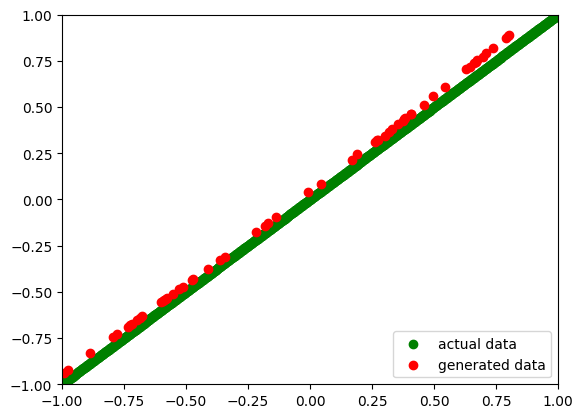

4/4 [==============================] - 0s 4ms/step
Epoch:  3000  Generator Loss:  [0.7797542214393616, 0.0]  Discriminator Loss:  [0.68339485 0.5       ]
2/2 [==============================] - 0s 5ms/step


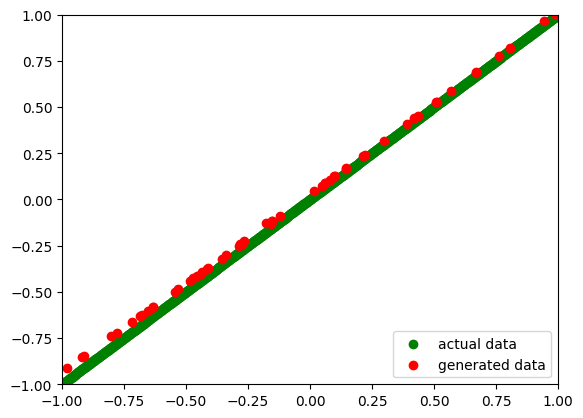

4/4 [==============================] - 0s 3ms/step
Epoch:  4000  Generator Loss:  [0.7876138687133789, 0.0]  Discriminator Loss:  [0.6791006 0.5      ]
2/2 [==============================] - 0s 4ms/step


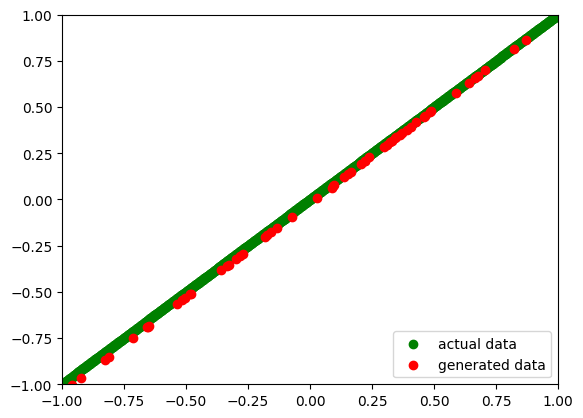

4/4 [==============================] - 0s 5ms/step
Epoch:  5000  Generator Loss:  [0.8097735643386841, 0.015625]  Discriminator Loss:  [0.67703182 0.46875   ]
2/2 [==============================] - 0s 9ms/step


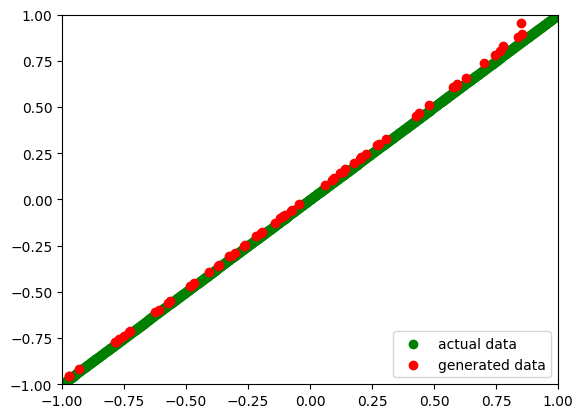

4/4 [==============================] - 0s 3ms/step
Epoch:  6000  Generator Loss:  [0.8040937781333923, 0.1328125]  Discriminator Loss:  [0.67682457 0.421875  ]
2/2 [==============================] - 0s 6ms/step


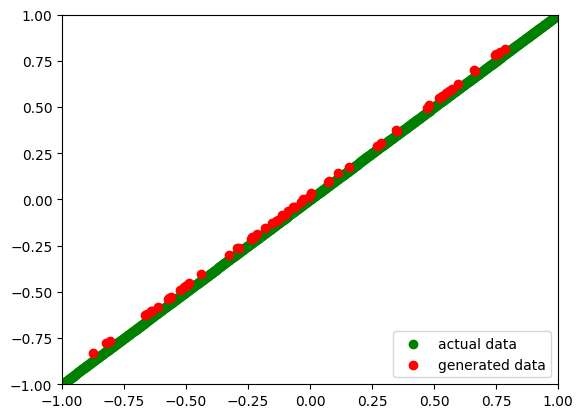

4/4 [==============================] - 0s 2ms/step
Epoch:  7000  Generator Loss:  [0.8294216394424438, 0.03125]  Discriminator Loss:  [0.68452483 0.4375    ]
2/2 [==============================] - 0s 6ms/step


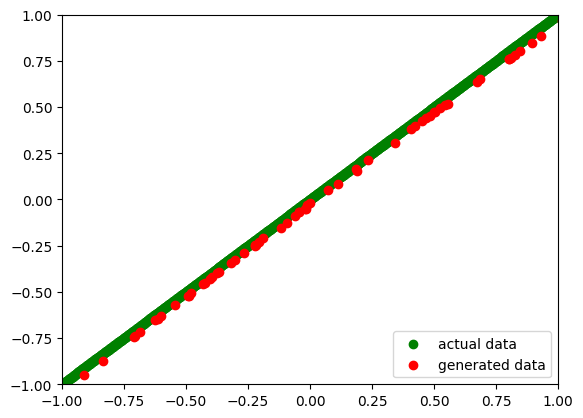

4/4 [==============================] - 0s 3ms/step
Epoch:  8000  Generator Loss:  [0.8190802335739136, 0.046875]  Discriminator Loss:  [0.65813732 0.45703125]
2/2 [==============================] - 0s 8ms/step


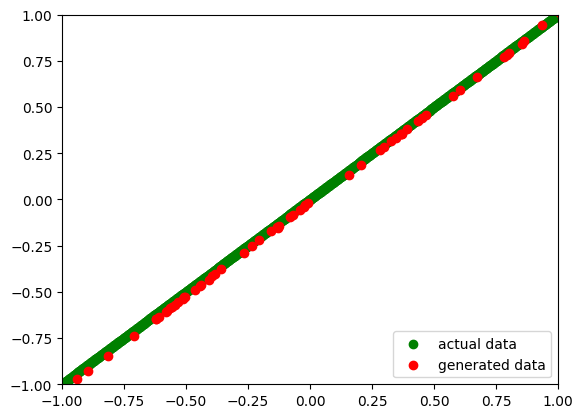

4/4 [==============================] - 0s 3ms/step
Epoch:  9000  Generator Loss:  [0.7937266230583191, 0.21875]  Discriminator Loss:  [0.671965  0.4140625]
2/2 [==============================] - 0s 7ms/step


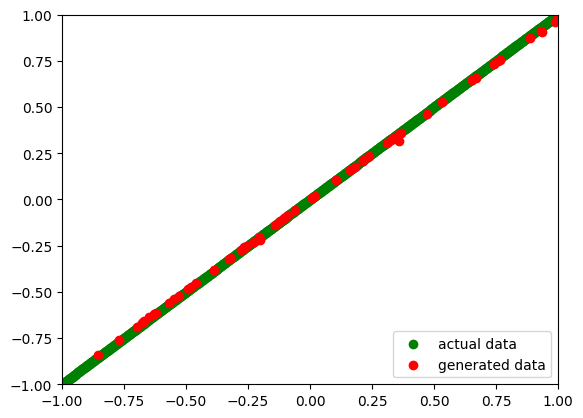

4/4 [==============================] - 0s 3ms/step
Epoch:  9999  Generator Loss:  [0.839988112449646, 0.0703125]  Discriminator Loss:  [0.68070838 0.4453125 ]
2/2 [==============================] - 0s 6ms/step


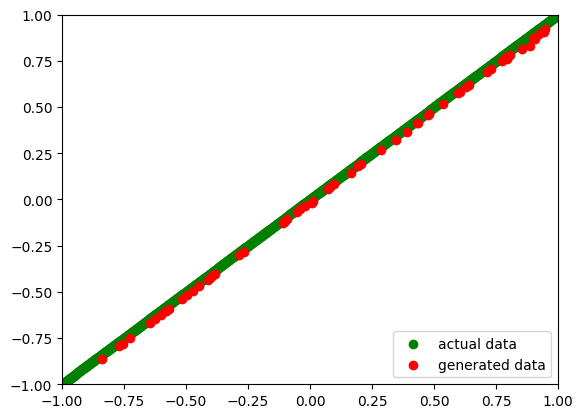

In [6]:
gen = generator()
disc = discriminator()
disc.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])
disc.trainable = False
gan = Sequential()
gan.add(gen)
gan.add(disc)
gan.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
train_gan(gen, disc, gan, 100)